In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
## Algorithms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as st
import warnings
warnings.filterwarnings('ignore')


In [121]:
df = pd.read_csv('tested.csv')

In [122]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [124]:
df.shape
print(df)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [125]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  1           152
male    0           266
Name: Survived, dtype: int64

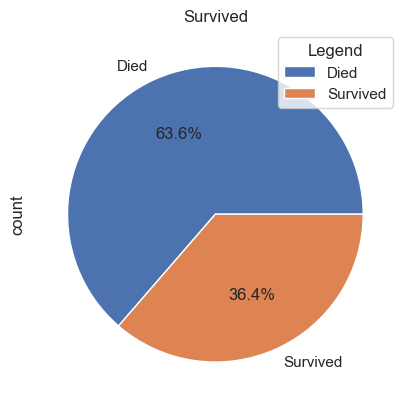

In [126]:
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Died', 'Survived'])
plt.title('Survived')
plt.legend(title='Legend', labels=['Died', 'Survived'], loc='upper right')
plt.show()

In [127]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

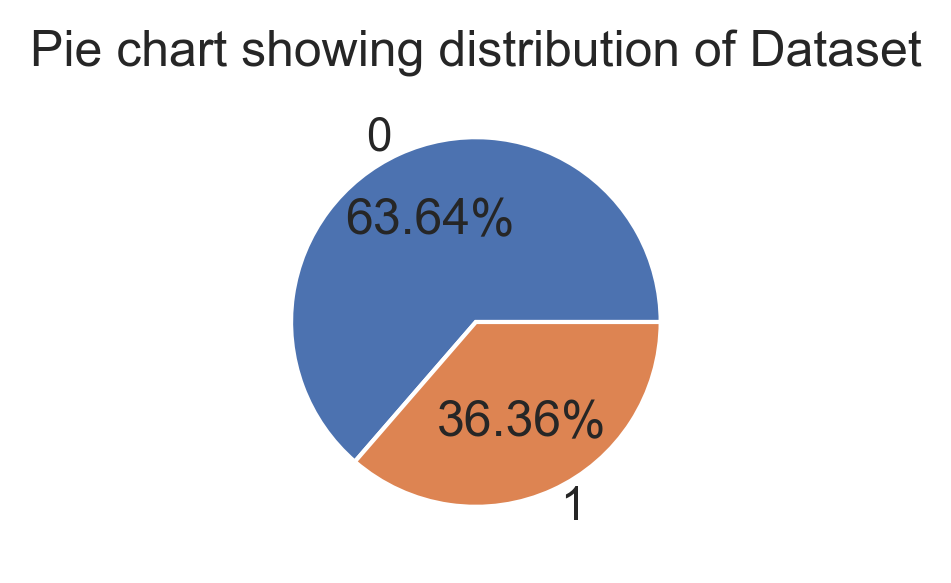

In [128]:
fig=plt.figure(figsize=(2,2),dpi=300,facecolor='w')
Datasets=df['Survived'].value_counts()
plt.pie(Datasets, labels=Datasets.index, autopct="%.2f%%")
plt.title("Pie chart showing distribution of Dataset")
plt.savefig('Dataset_pie.png' ,dpi=300 ,bbox_inches='tight')
plt.show()

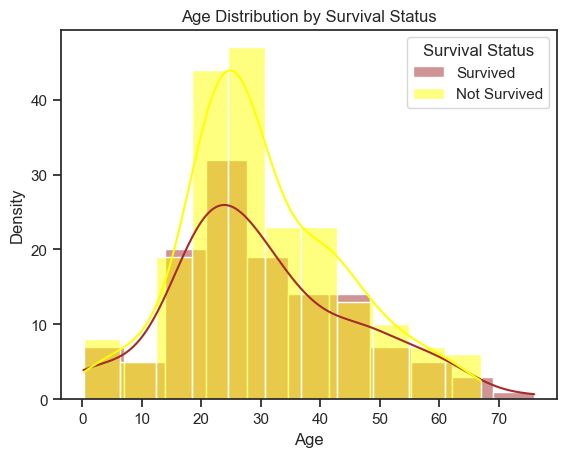

In [129]:
sns.histplot(data = df[df['Survived'] == 1], x='Age' , kde=True , color='brown', label='Survived')
sns.histplot(data = df[df['Survived'] == 0], x='Age' , kde=True , color='yellow' , label='Not Survived') 
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Survival Status')
plt.legend(title='Survival Status')
plt.show()

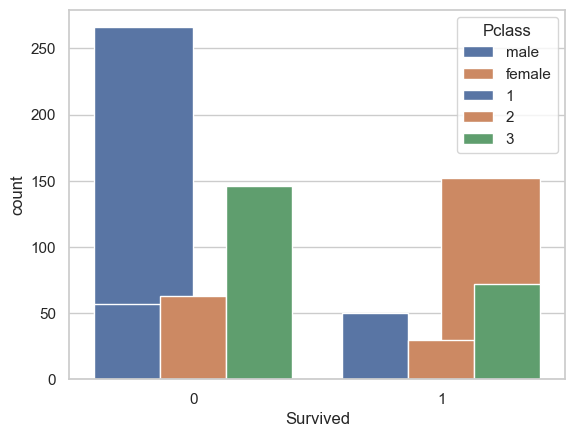

In [130]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=df)
sns.countplot(x="Survived",hue="Pclass",data=df);

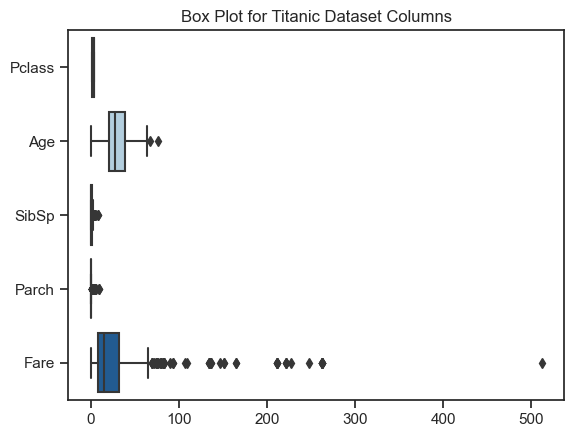

In [131]:
df.columns
column_names = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Set the style for the plot
sns.set(style="ticks")

# Create a box plot for the specified columns
sns.boxplot(data=df[column_names], orient='h', palette='Blues')

# Set the title for the plot
plt.title('Box Plot for Titanic Dataset Columns')

# Display the plot
plt.show()

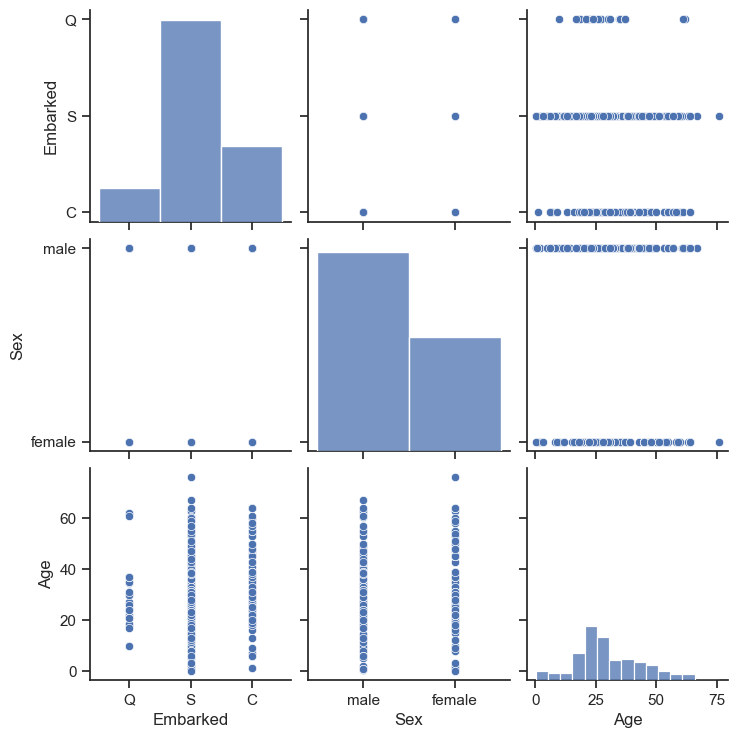

In [132]:
sns.pairplot(data=df, vars=['Embarked', 'Sex', 'Age'])

In [133]:
print(df['Embarked'].value_counts())
print(df['Sex'].value_counts())

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64
Sex
male      266
female    152
Name: count, dtype: int64


In [134]:
df['Embarked'].fillna(df['Embarked'].mode().values[0],inplace = True)
## Replacing Continuous Variable with Mean
df['Fare'].fillna(df['Fare'].mean(),inplace = True)
## Replacing object Values with int
df['Sex']=df['Sex'].replace({'female':1,'male':0})
## Replacing missing value in 'Age' with mean value
df['Age'].fillna(df['Age'].mean(),inplace=True)
## Embarked
df['Embarked']=df['Embarked'].replace({'Q':0,'S':1,'C':2}).astype(int)
#currently imputing the missing values in Survived columns
df['Survived'].fillna(0, inplace=True)

In [135]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,0
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1


In [136]:
df = df.drop(['Ticket','Cabin'],axis = 1)

In [137]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [138]:
### Checking Max , Min , Mean Age of passenger present inside the ship
print('Oldest Passenger was of:',df['Age'].max(),'Years')
print('Youngest Passenger was of:',df['Age'].min(),'Years')
print('Average Age on the ship:',df['Age'].mean(),'Years')

Oldest Passenger was of: 76.0 Years
Youngest Passenger was of: 0.17 Years
Average Age on the ship: 30.272590361445783 Years


             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.023245 -0.026751 -0.023245 -0.030874  0.003818   
Survived       -0.023245  1.000000 -0.108615  1.000000 -0.000011  0.099943   
Pclass         -0.026751 -0.108615  1.000000 -0.108615 -0.440782  0.001087   
Sex            -0.023245  1.000000 -0.108615  1.000000 -0.000011  0.099943   
Age            -0.030874 -0.000011 -0.440782 -0.000011  1.000000 -0.079535   
SibSp           0.003818  0.099943  0.001087  0.099943 -0.079535  1.000000   
Parch           0.043080  0.159120  0.018721  0.159120 -0.045073  0.306895   
Fare            0.008209  0.191382 -0.576619  0.191382  0.326800  0.171488   
Embarked       -0.001026 -0.037432 -0.372344 -0.037432  0.126594  0.041221   

                Parch      Fare  Embarked  
PassengerId  0.043080  0.008209 -0.001026  
Survived     0.159120  0.191382 -0.037432  
Pclass       0.018721 -0.576619 -0.372344  
Sex          0.159120  0.191382 -0.037432  

<Axes: >

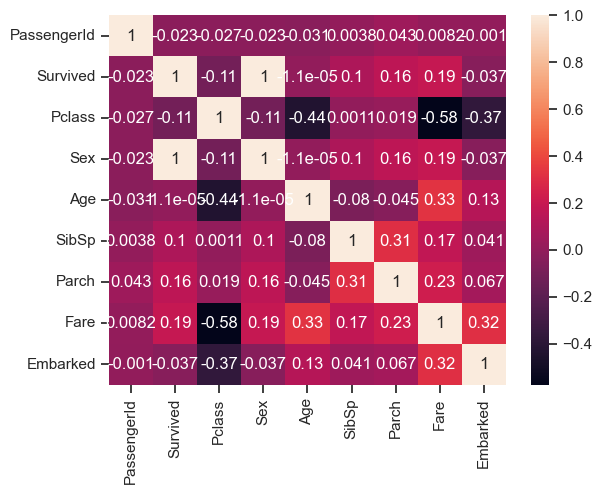

In [139]:
#corr = titanic.corr()
#new code becacuse name column has string data type an also name column is not usefull
corr = df.drop('Name', axis=1).corr()
print(corr)
sns.heatmap(corr, annot=True)

<h2> Train Testing Data</h2>

In [140]:
# Now that pre-processing is complete, split data into X_train, y_train, X_test, and y_t
# Separate the features (X) and the target variable (y)
X = df.drop(['Survived','Name'], axis=1)
y = df['Survived']
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Verify the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (334, 8)
y_train shape: (334,)
X_test shape: (84, 8)
y_test shape: (84,)


<h2> If Standard Scalling is Required <h2>

In [141]:
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)
print("X_train_scaled: ", X_train_scaled.shape)
print("X_test_scaled: ", X_test_scaled.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train_scaled:  (334, 8)
X_test_scaled:  (84, 8)
y_train:  (334,)
y_test:  (84,)


<h2> Apply Random Forest</h2>

In [142]:
# Create a Random Forest Classifier object
rf_classifier = RandomForestClassifier()
# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)
# Predict on the test data
y_pred = rf_classifier.predict(X_test)

In [143]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [144]:
## Classfication Report code
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



<h2> Applying RandomForestClassifier / Hyperparameter</h2>

In [145]:
# Create a Random Forest Classifier object
rf_classifier = RandomForestClassifier()
param_grid = {
 'max_depth': st(3, 11),
 'max_features': ["sqrt", "log2"],
 'max_leaf_nodes': st(6, 10)
}
# Define the number of folds for cross-validation
cv = 5
# Define the scoring metric
scoring = 'accuracy'
# Define the number of parameter settings to sample
n_iter = 10
# Define the random state for reproducibility
rstate = 42
grid = RandomizedSearchCV(rf_classifier,
 param_distributions=param_grid,
cv=cv,
scoring=scoring,
verbose=1,
n_iter=n_iter,
random_state=rstate)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026E3A9ED4D0>,
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026E3A9FD6D0>},
                   random_state=42, scoring='accuracy', verbose=1)

In [146]:
# Predict on the test data
y_pred_grid = grid.predict(X_test)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_grid)
precision = precision_score(y_test, y_pred_grid)
recall = recall_score(y_test, y_pred_grid)
f1 = f1_score(y_test, y_pred_grid)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


<h2> Applying Gradient Boosting classifier</h2>

In [147]:
# Create a Gradient Boosting Classifier object
gbm_classifier = GradientBoostingClassifier()
# Fit the classifier to the training data
gbm_classifier.fit(X_train, y_train)
# Predict on the test data
y_pred_gbm = gbm_classifier.predict(X_test)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_gbm)
precision = precision_score(y_test, y_pred_gbm)
recall = recall_score(y_test, y_pred_gbm)
f1 = f1_score(y_test, y_pred_gbm)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


<h2> Applying XGBoost Classifier</h2>

In [148]:
# Create an XGBoost Classifier object
xgb_classifier = XGBClassifier()
# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)
# Predict on the test data
y_pred_xgb = xgb_classifier.predict(X_test)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [150]:
import pickle
# Save the model to a file / (filename = pickel_filename.pkl) you want to save
filename = 'rf_model.pkl'
with open(filename, 'wb') as file:
 pickle.dump(rf_classifier, file)